### Visualizing Model Outputs

In [1]:
import pandas as pd
import numpy as np
from numpy import inf
import os
import matplotlib.style as style
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters

np.seterr(divide = 'ignore') 
pd.options.mode.chained_assignment = None
register_matplotlib_converters()
%matplotlib inline


In [2]:
all_data = pd.read_pickle('.\\..\\data\\covid_df.pkl')
output = pd.read_pickle('.\\..\\data\\predictions_log_total.pkl')

In [3]:
mlp = pd.read_pickle('.\\..\\data\\mlp_predictions.pkl')

<ipython-input-17-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


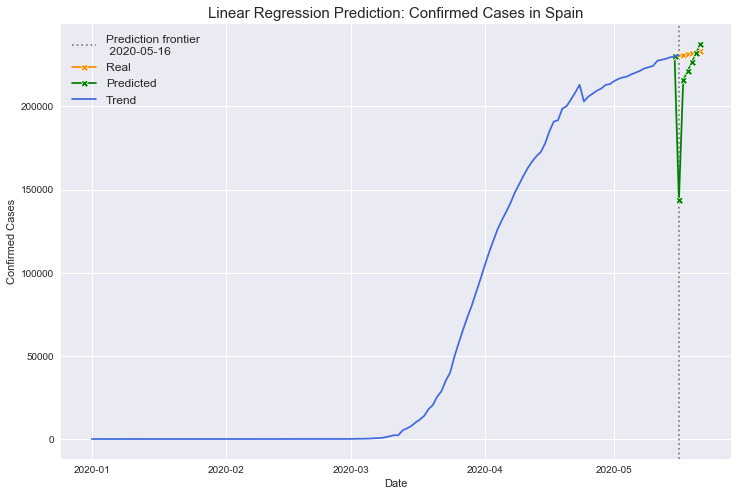

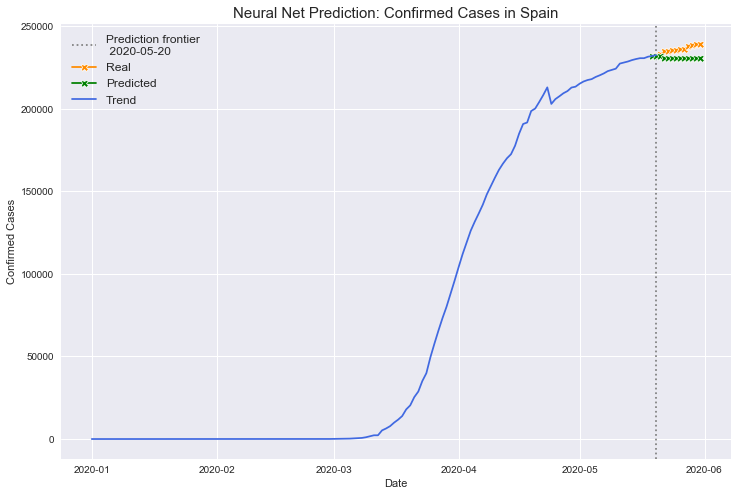

<ipython-input-17-50e61317cdfa>:53: RuntimeWarning: overflow encountered in exp
  post_reg = np.exp(row.append(post_reg[[real, predict]]))


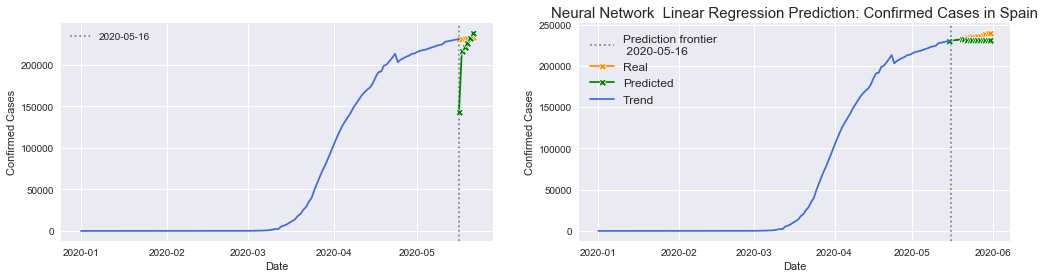

In [17]:
def predicted_vs_real(full_df, output_df, country, target, logged=False, net=False):
    '''
    '''
    style.use('seaborn')
    date = output_df.index.min()
    pre = full_df[(full_df['Country'] == country) & (full_df['Date'] <= date)][[target, 'Date']]
    real = country + ' real'
    predict = country + ' prediction'
    post = output_df[[real, predict]]  
    day = pre['Date'].max() + dt.timedelta(days=-1)
    row = pre[pre['Date'] == day][[target, 'Date']]
    val = row[target]
    if logged:
        row[real], row[predict] = (np.log(val), np.log(val))
    else:
        row[real], row[predict] = (val, val)
    row.set_index('Date', inplace=True)
    post = row.append(post[[real, predict]])
    if logged:
        post = np.exp(post)
        
    fig, ax = plt.subplots(figsize=(12, 8))
    title = 'Prediction: {} in {}'.format(target, country)
    if net:
        title = 'Neural Net ' + title
    else:
        title = 'Linear Regression ' + title
    plt.title(label=title, fontsize=15)
    ax.axvline(x=date, ls=':', c='gray', label = str(date))
    g = sns.lineplot(x=post.index, y=post[real], ax=ax, marker='X', color='darkorange')
    g = sns.lineplot(x=post.index, y=post[predict], ax=ax, marker='X', color='g')
    g = sns.lineplot(x=pre['Date'], y=pre[target], ax=ax, color='royalblue')
    plt.legend(('Prediction frontier\n {}'.format(date), 'Real', 'Predicted', 'Trend'), prop={'size': 12})
    plt.ylabel(target)
    plt.show()

def side_by_side(full_df, output1, output2, country, target):
    style.use('seaborn')
    date = output1.index.min()
    pre = full_df[(full_df['Country'] == country) & (full_df['Date'] <= date)][[target, 'Date']]
    real = country + ' real'
    predict = country + ' prediction'
    post_reg = output1[[real, predict]]  
    post_net = output2[[real, predict]]  
    day = pre['Date'].max() + dt.timedelta(days=-1)
    row = pre[pre['Date'] == day][[target, 'Date']]
    val = row[target]

    row[real], row[predict] = (val, val)
    row.set_index('Date', inplace=True)
    post_net = row.append(post_net[[real, predict]])
    row[real], row[predict] = (np.log(val), np.log(val))
    post_reg = np.exp(row.append(post_reg[[real, predict]]))
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17,4))
    title = 'Prediction: {} in {}'.format(target, country)
    for output in [output1]:
        title = 'Linear Regression ' + title
        plt.title(label=title, fontsize=15)
        ax1.axvline(x=date, ls=':', c='gray', label = str(date))
        g = sns.lineplot(x=post_reg.index, y=post_reg[real], ax=ax1, marker='X', color='darkorange')
        g = sns.lineplot(x=post_reg.index, y=post_reg[predict], ax=ax1, marker='X', color='g')
        g = sns.lineplot(x=pre['Date'], y=pre[target], ax=ax1, color='royalblue')
        plt.legend(('Prediction frontier\n {}'.format(date), 'Real', 'Predicted', 'Trend'), prop={'size': 12})
        plt.ylabel(target)

    for output in [output2]:
        title = 'Neural Network  ' + title
        plt.title(label=title, fontsize=15)
        ax2.axvline(x=date, ls=':', c='gray', label = str(date))
        g = sns.lineplot(x=post_net.index, y=post_net[real], ax=ax2, marker='X', color='darkorange')
        g = sns.lineplot(x=post_net.index, y=post_net[predict], ax=ax2, marker='X', color='g')
        g = sns.lineplot(x=pre['Date'], y=pre[target], ax=ax2, color='royalblue')
        plt.legend(('Prediction frontier\n {}'.format(date), 'Real', 'Predicted', 'Trend'), prop={'size': 12})  
        plt.ylabel(target)
    plt.show()
predicted_vs_real(all_data, output, 'Spain', 'Confirmed Cases', logged=True)
predicted_vs_real(all_data, mlp, 'Spain', 'Confirmed Cases', logged=False, net=True)
side_by_side(all_data,output, mlp, 'Spain', 'Confirmed Cases')

In [11]:
'''
for country in all_data['Country'].unique():
    try:
        predicted_vs_real(all_data, output, country, 'Confirmed Cases', logged=True)
    except:
        print('COUNTRY 3#\n#\n#\n#\n####', country)
        try:
            predicted_vs_real(all_data, mlp, country, 'Confirmed Cases', logged=False, net=True)
        except:
            print('NEURAL NET 3#\n#\n#\n#\n####', country)
    else:
        try:
            predicted_vs_real(all_data, mlp, country, 'Confirmed Cases', logged=False, net=True)
        except:
            print('NEURAL NET 3#\n#\n#\n#\n####', country)
'''

"\nfor country in all_data['Country'].unique():\n    try:\n        predicted_vs_real(all_data, output, country, 'Confirmed Cases', logged=True)\n    except:\n        print('COUNTRY 3#\n#\n#\n#\n####', country)\n        try:\n            predicted_vs_real(all_data, mlp, country, 'Confirmed Cases', logged=False, net=True)\n        except:\n            print('NEURAL NET 3#\n#\n#\n#\n####', country)\n    else:\n        try:\n            predicted_vs_real(all_data, mlp, country, 'Confirmed Cases', logged=False, net=True)\n        except:\n            print('NEURAL NET 3#\n#\n#\n#\n####', country)\n"

In [12]:
for country in all_data['Country'].unique():
    try:
        side_by_side(all_data,output, mlp, country, 'Confirmed Cases')
    except:
        print('country missing:', country, '\n\n\n')

country missing: Afghanistan 



country missing: Albania 



country missing: Algeria 



country missing: Angola 



country missing: Argentina 



country missing: Australia 



country missing: Austria 



country missing: Azerbaijan 



country missing: Bahrain 



country missing: Bangladesh 



country missing: Barbados 



country missing: Belarus 



country missing: Belgium 



country missing: Belize 



country missing: Benin 



country missing: Bhutan 



country missing: Bolivia 



country missing: Bosnia and Herzegovina 



country missing: Botswana 



country missing: Brazil 



country missing: Brunei 



country missing: Bulgaria 



country missing: Burkina Faso 



country missing: Burma 



country missing: Burundi 



country missing: Cambodia 



country missing: Cameroon 



country missing: Canada 



country missing: Central African Republic 



country missing: Chad 



country missing: Chile 



country missing: China 



country missing: Colombia 



cou

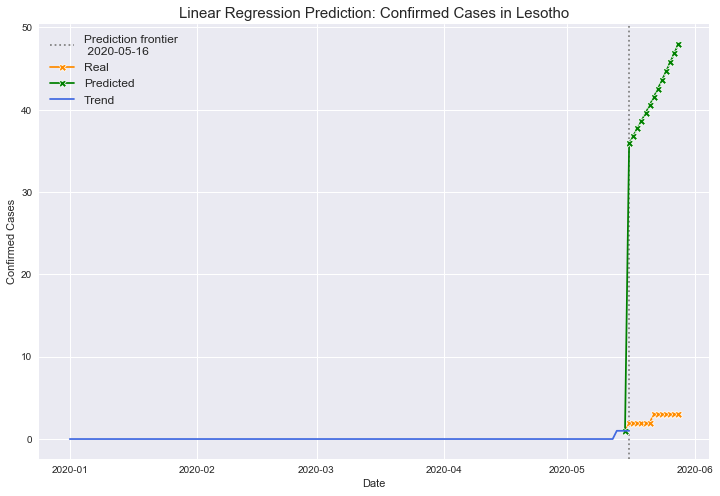

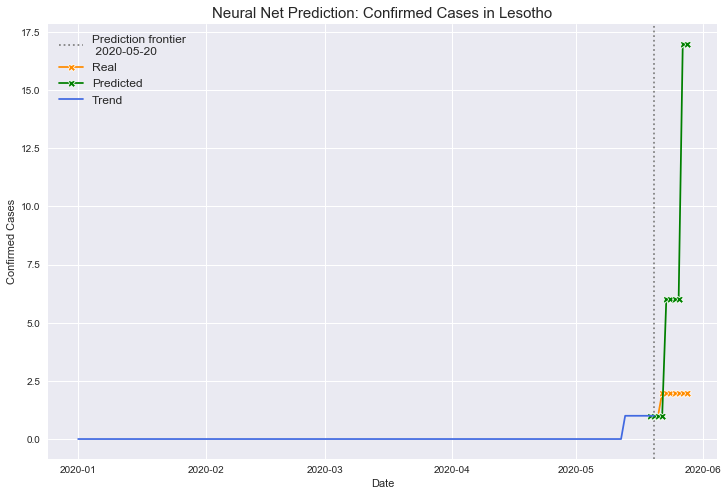

In [7]:
predicted_vs_real(all_data, output, 'Lesotho', 'Confirmed Cases', logged=True)
predicted_vs_real(all_data, mlp, 'Lesotho', 'Confirmed Cases', logged=False, net=True)

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


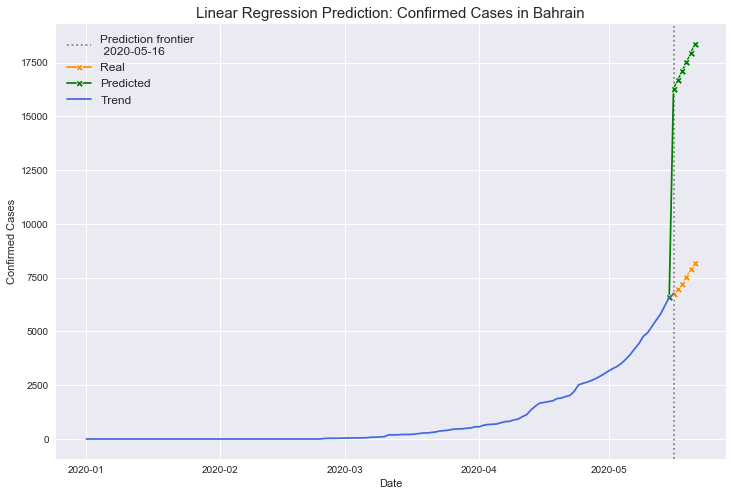

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


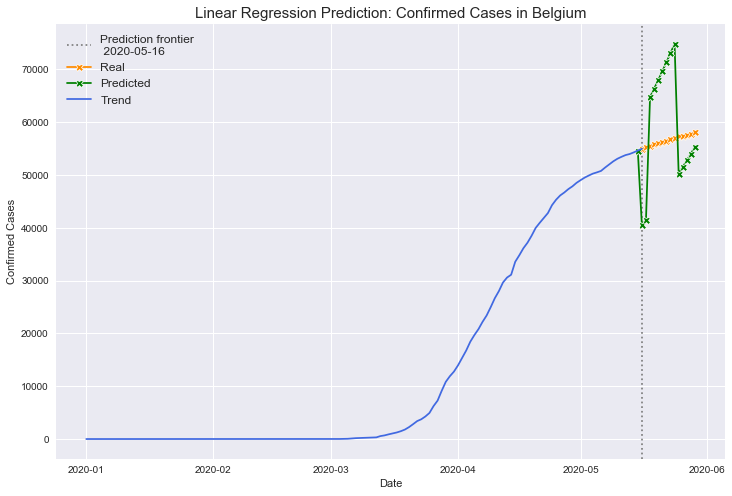

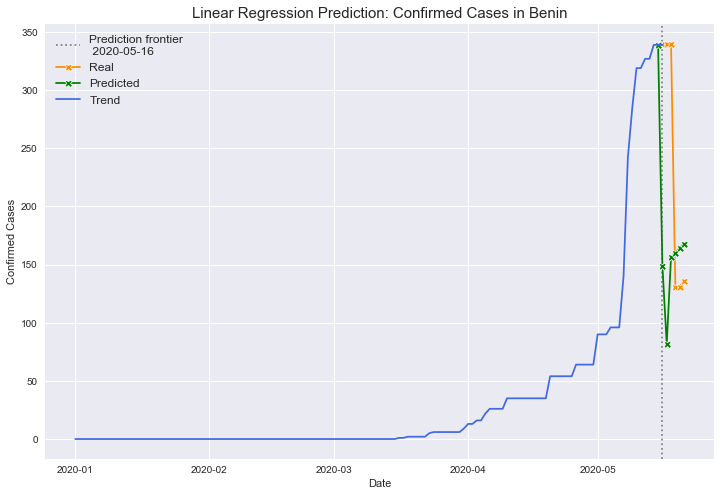

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


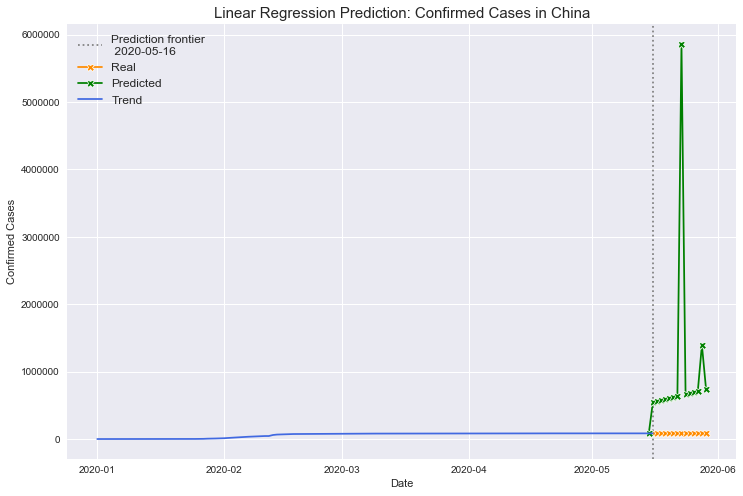

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


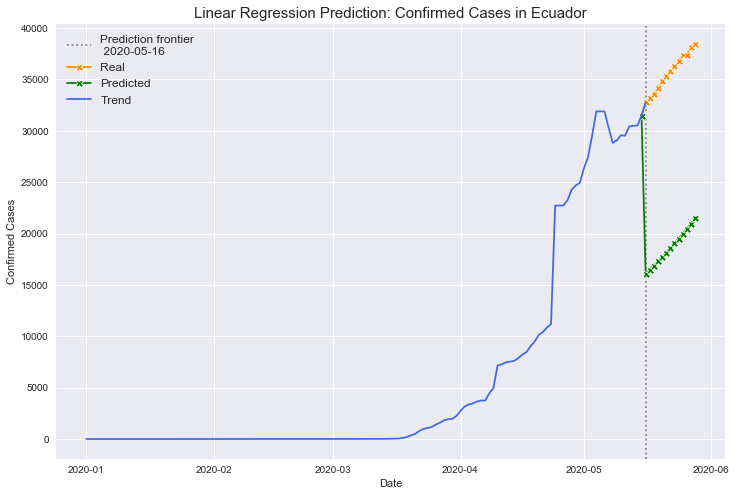

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


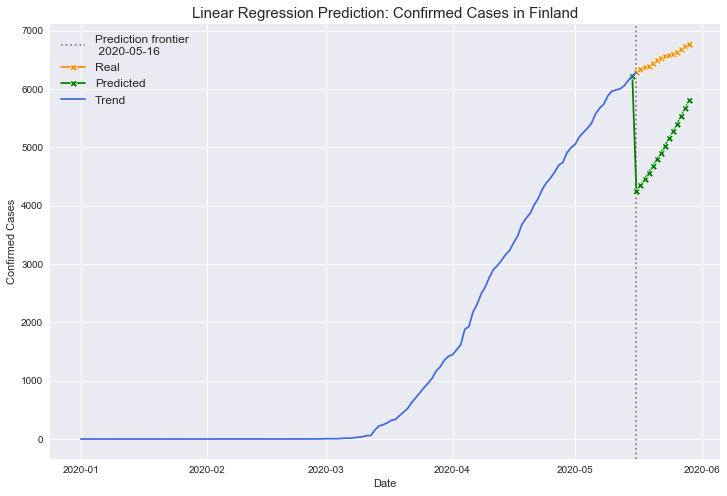

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


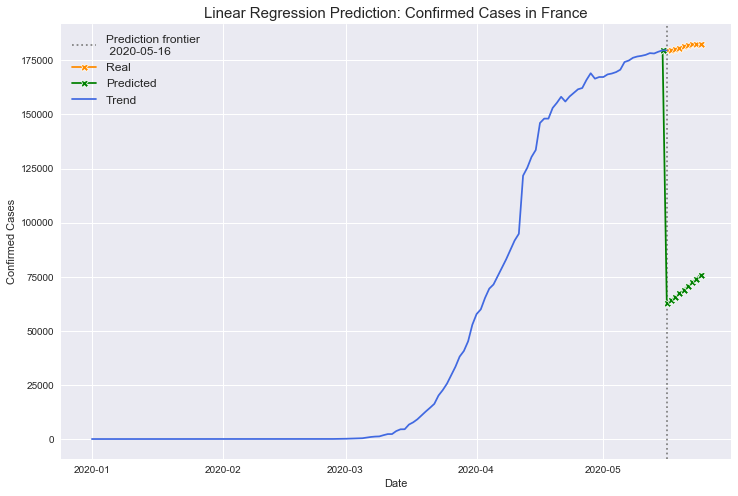

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


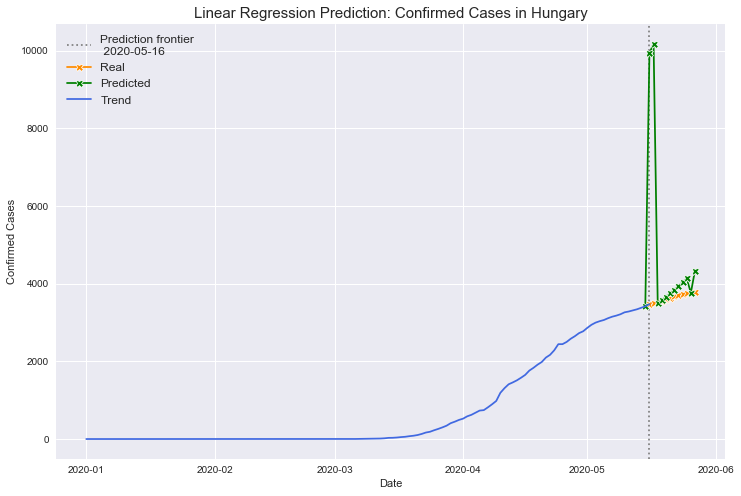

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


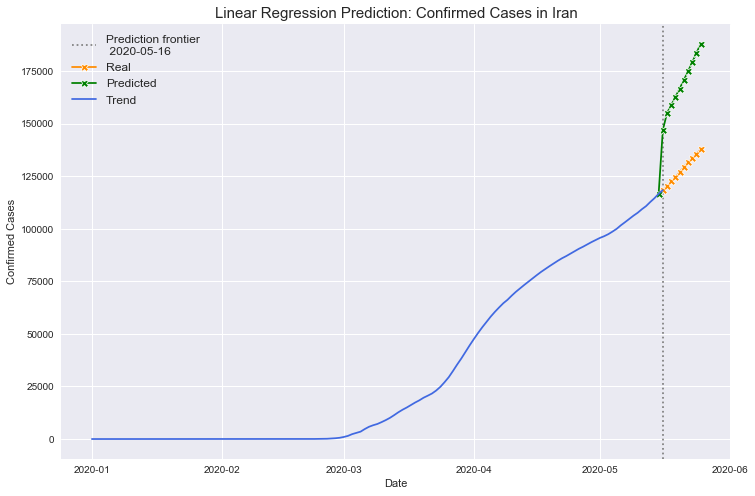

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


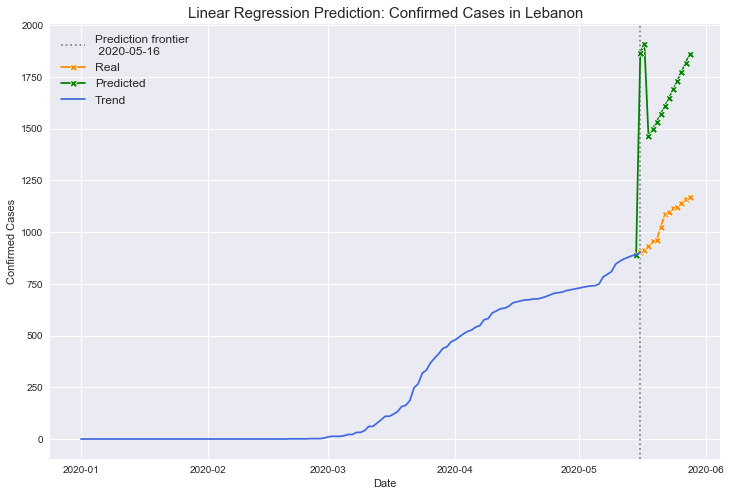

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


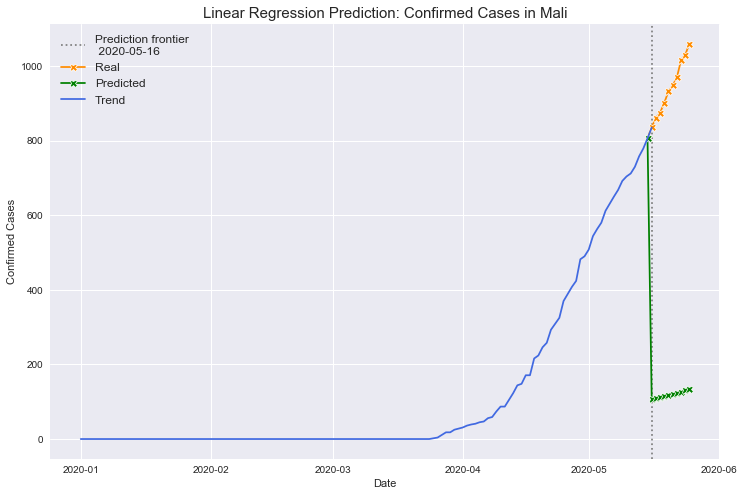

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


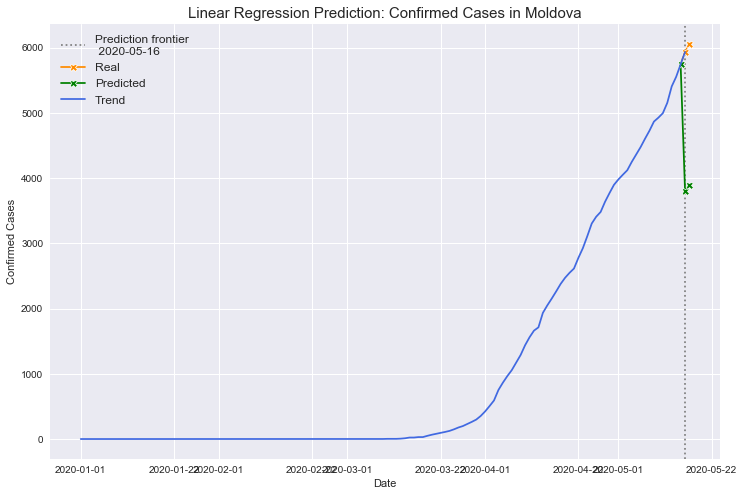

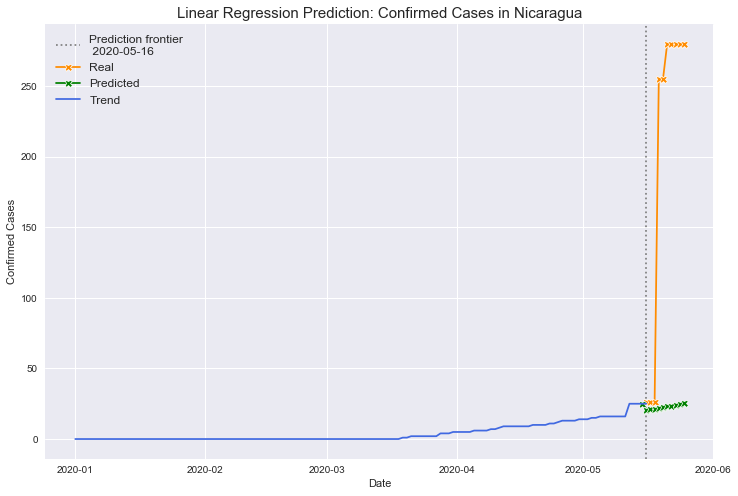

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


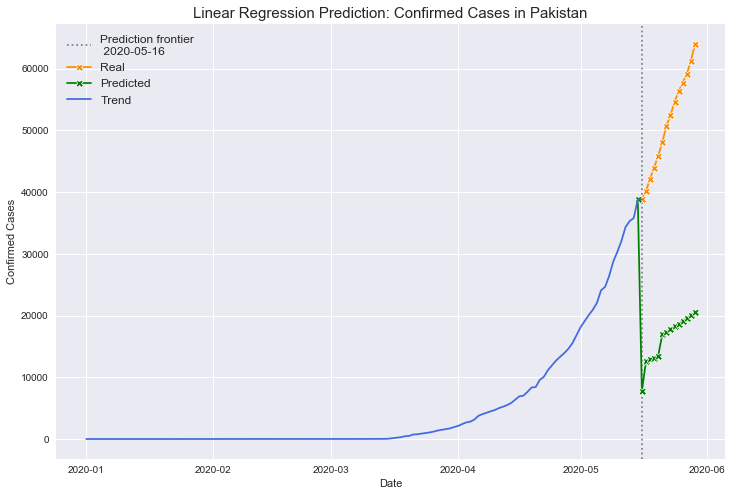

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


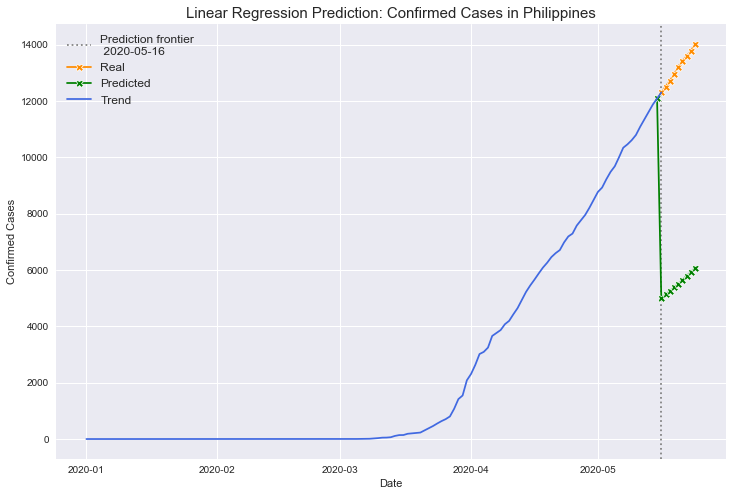

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


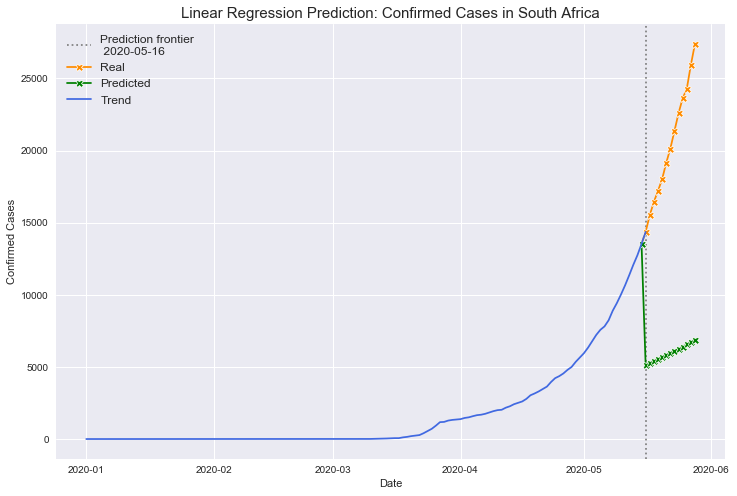

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


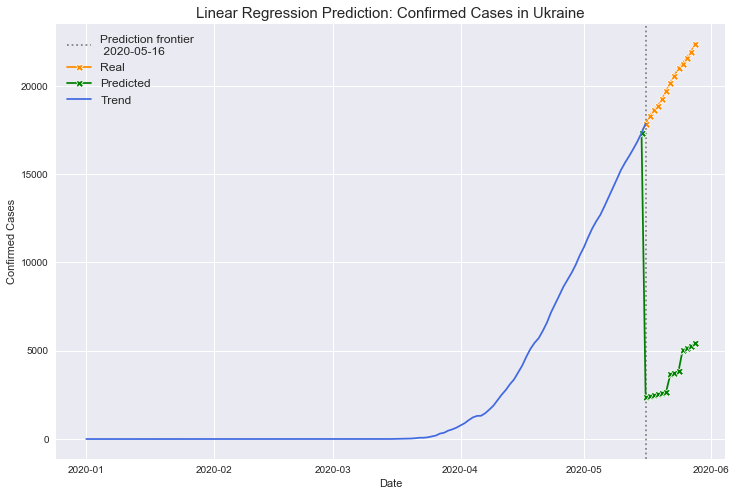

<ipython-input-4-50e61317cdfa>:20: RuntimeWarning: overflow encountered in exp
  post = np.exp(post)


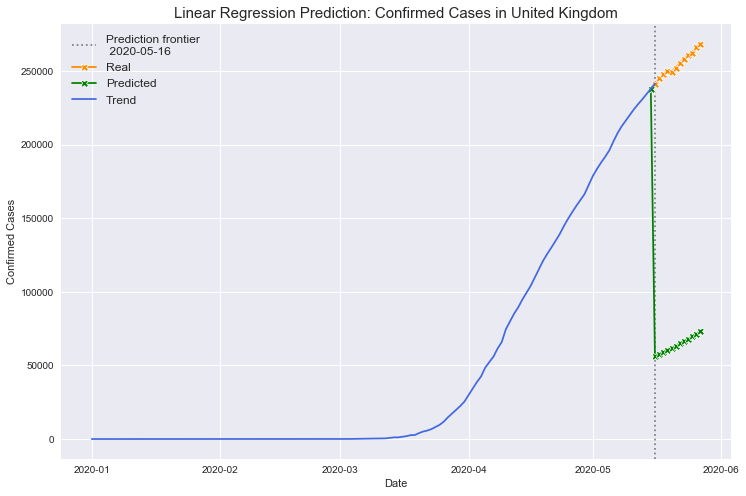

In [8]:
best_models = ['Bahrain', 'Belgium','Benin', 'China', 'Ecuador', 'Finland', 'France', 'Hungary', 'Iran', 'Lebanon', 'Mali', 'Moldova', 'Nicaragua', 'Pakistan', 'Philippines',\
               'South Africa', 'Ukraine', 'United Kingdom']
for country in best_models:
    predicted_vs_real(all_data, output, country, 'Confirmed Cases', logged=True)